In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import api_function as ap
import plot_function as pf
import api_function as af
import pandas_datareader as pdr
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from stock_function import manipulate
pio.templates.default = 'presentation'

In [2]:
df_apple, df_bitcoin, df_facebook, df_google, df_microsoft, df_tesla = af.get_all_focused_stocks(start_date='2015-01-01')

In [3]:
df_apple = manipulate(df_apple)
df_bitcoin = manipulate(df_bitcoin)
df_facebook = manipulate(df_facebook)
df_google = manipulate(df_google)
df_microsoft = manipulate(df_microsoft)
df_tesla = manipulate(df_tesla)

In [4]:
df_stocks_close = pd.concat([df_apple['close'], df_bitcoin['close'], df_tesla['close'], df_microsoft['close'], df_google['close'], df_facebook['close']], axis=1).dropna()
df_stocks_close.columns = ['apple', 'bitcoin', 'tesla', 'microsoft', 'google', 'facebook']

In [5]:
df_stocks_ratio = pd.concat([df_apple['ratio'], df_bitcoin['ratio'], df_tesla['ratio'], df_microsoft['ratio'], df_google['ratio'], df_facebook['ratio']], axis=1).dropna()
df_stocks_ratio.columns = ['apple', 'bitcoin', 'tesla', 'microsoft', 'google', 'facebook']

In [6]:
df_stocks_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1831 entries, 2015-01-02 to 2022-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   apple      1831 non-null   float64
 1   bitcoin    1831 non-null   float64
 2   tesla      1831 non-null   float64
 3   microsoft  1831 non-null   float64
 4   google     1831 non-null   float64
 5   facebook   1831 non-null   float64
dtypes: float64(6)
memory usage: 100.1 KB


In [7]:
df_bitcoin.ratio = df_stocks_ratio.bitcoin
df_bitcoin = df_bitcoin.dropna()

In [8]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1831 entries, 2015-01-02 to 2022-04-08
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   high       1831 non-null   float64
 1   low        1831 non-null   float64
 2   open       1831 non-null   float64
 3   close      1831 non-null   float64
 4   volume     1831 non-null   float64
 5   adj_close  1831 non-null   float64
 6   ratio      1831 non-null   float64
 7   absolute   1831 non-null   float64
 8   avg_ratio  1831 non-null   float64
dtypes: float64(9)
memory usage: 143.0 KB


In [9]:
fig = px.line(x=df_tesla.index, y=[df_tesla.ratio, df_apple.ratio, df_microsoft.ratio, df_google.ratio, df_facebook.ratio, df_bitcoin.ratio])
fig.update_traces(line=dict(width=0.5))
fig.show()

In [10]:
#plt.figure(figsize=(80,10))
#plt.plot(df_tesla.index, df_tesla.ratio, lw=1)
#plt.plot(df_apple.index, df_apple.ratio, lw=1)
#plt.plot(df_bitcoin.index, df_bitcoin.ratio, lw=1)
#plt.plot(df_microsoft.index, df_microsoft.ratio, lw=1)
#plt.plot(df_google.index, df_google.ratio, lw=1)
#plt.plot(df_facebook.index, df_facebook.ratio, lw=1)
#plt.legend(['Tesla', 'Apple', 'Bitcoin', 'Microsoft', 'Google', 'Facebook'])
#plt.show()


In [11]:
df_stocks_ratio_normed = df_stocks_ratio
df_stocks_ratio_normed['microsoft'] = df_stocks_ratio['microsoft']/df_stocks_ratio['microsoft'][df_stocks_ratio['microsoft'].first_valid_index()]
df_stocks_ratio_normed['apple'] = df_stocks_ratio['apple']/df_stocks_ratio['apple'][df_stocks_ratio['apple'].first_valid_index()]
df_stocks_ratio_normed['bitcoin'] = df_stocks_ratio['bitcoin']/df_stocks_ratio['bitcoin'][df_stocks_ratio['bitcoin'].first_valid_index()]
df_stocks_ratio_normed['tesla'] = df_stocks_ratio['tesla']/df_stocks_ratio['tesla'][df_stocks_ratio['tesla'].first_valid_index()]
df_stocks_ratio_normed['google'] = df_stocks_ratio['google']/df_stocks_ratio['google'][df_stocks_ratio['google'].first_valid_index()]
df_stocks_ratio_normed['facebook'] = df_stocks_ratio['facebook']/df_stocks_ratio['facebook'][df_stocks_ratio['facebook'].first_valid_index()]

In [12]:
df_ratio_semimonth = df_stocks_ratio_normed.reset_index()
df_ratio_semimonth = df_ratio_semimonth.rename(columns={'Date':'timestamp'})
df_ratio_semimonth.head()

,timestamp,apple,bitcoin,tesla,microsoft,google,facebook
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,1.018642,-0.646014,1.301386,-0.402479,2.260302,6.123458
2,2015-01-06,0.142109,-0.768912,-0.363593,-7.344178,3.189251,8.452610
3,2015-01-07,-0.277428,-0.526573,0.704237,2.537011,1.465755,4.803388
4,2015-01-08,-1.316796,0.668767,0.644247,8.383958,-1.186230,-11.342109


In [13]:
df_ratio_semimonth = df_ratio_semimonth.groupby([pd.Grouper(key='timestamp', freq='SM')])[['tesla', 'apple', 'bitcoin', 'microsoft', 'google', 'facebook']].mean().reset_index().sort_values('timestamp')
print(df_ratio_semimonth)

     timestamp     tesla     apple   bitcoin  microsoft    google  facebook
0   2014-12-31  0.180565  0.300255  0.718532  -1.563389  0.952069  3.166867
1   2015-01-15 -0.407046  0.208001 -0.386585  -1.090280 -0.438633  1.705250
2   2015-01-31 -0.643187 -0.267273  0.030160   1.289024 -0.427611  0.660890
3   2015-02-15  0.025227 -0.088308 -0.118314   0.486734 -0.553889 -2.309302
4   2015-02-28  0.276132  0.345759 -0.231474  -0.229416  0.151482 -0.233123
..         ...       ...       ...       ...        ...       ...       ...
170 2022-01-31 -0.222975 -0.099997 -0.090845  -1.009744  0.967082  2.591301
171 2022-02-15 -0.086313 -0.155576  0.072501   1.902681  0.152649 -4.630547
172 2022-02-28  0.425850  0.351118 -0.270206  -2.804779  0.820272  5.712836
173 2022-03-15 -1.456140 -0.782749 -0.194438   4.490296 -1.137891 -9.448222
174 2022-03-31  0.265996  0.085955  0.212830  -0.944521  0.571217  0.916864

[175 rows x 7 columns]


In [14]:
fig = px.line(df_ratio_semimonth, x='timestamp', y=['apple', 'bitcoin', 'tesla', 'microsoft', 'google', 'facebook'])
fig.update_traces(line=dict(width=0.5))
fig.show()

In [15]:
#plt.figure(figsize=(80,10))

#plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.apple)
#plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.bitcoin)
#plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.tesla)
#plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.microsoft)
#plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.google)
#plt.plot(df_ratio_semimonth.timestamp, df_ratio_semimonth.facebook)
#plt.legend(['Apple','Bitcoin', 'Tesla', 'Microsoft', 'Google', 'Facebook'])
#plt.show()

In [16]:
df_stocks_close_normed = df_stocks_close
df_stocks_close_normed['microsoft'] = df_stocks_close_normed['microsoft']/df_stocks_close_normed['microsoft'][df_stocks_close_normed['microsoft'].first_valid_index()]
df_stocks_close_normed['apple'] = df_stocks_close_normed['apple']/df_stocks_close_normed['apple'][df_stocks_close_normed['apple'].first_valid_index()]
df_stocks_close_normed['bitcoin'] = df_stocks_close_normed['bitcoin']/df_stocks_close_normed['bitcoin'][df_stocks_close_normed['bitcoin'].first_valid_index()]
df_stocks_close_normed['tesla'] = df_stocks_close_normed['tesla']/df_stocks_close_normed['tesla'][df_stocks_close_normed['tesla'].first_valid_index()]
df_stocks_close_normed['google'] = df_stocks_close_normed['google']/df_stocks_close_normed['google'][df_stocks_close_normed['google'].first_valid_index()]
df_stocks_close_normed['facebook'] = df_stocks_close_normed['facebook']/df_stocks_close_normed['facebook'][df_stocks_close_normed['facebook'].first_valid_index()]

In [17]:
df_stocks_close_normed_y = df_stocks_close_normed[df_stocks_close_normed.index.weekday.isin([0,1,2,3,4])].reset_index()
df_stocks_close_normed_y_woBTC = df_stocks_close_normed_y.drop(columns= {'bitcoin', 'tesla'})

In [18]:
df_stocks_close_normed_y.head()

,timestamp,apple,bitcoin,tesla,microsoft,google,facebook
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.971828,0.957124,0.957959,0.990804,0.979154,0.983939
2,2015-01-06,0.971920,0.997975,0.963385,0.976262,0.956460,0.970682
3,2015-01-07,0.985548,1.026388,0.961880,0.988666,0.954822,0.970682
4,2015-01-08,1.023415,0.988072,0.960376,1.017750,0.957832,0.996558


In [19]:
fig = px.line(df_stocks_close_normed_y, x='timestamp', y=['apple', 'bitcoin', 'tesla', 'microsoft', 'google', 'facebook'])
fig.update_traces(line=dict(width=0.5))
fig.show()

In [20]:
#plt.figure(figsize=(80,10))

#plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.apple)
#plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.bitcoin)
#plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.tesla)
#plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.microsoft)
#plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.google)
#plt.plot(df_stocks_close_normed_y.timestamp, df_stocks_close_normed_y.facebook)
#plt.legend(['Apple', 'Microsoft', 'Google', 'Facebook'])



In [21]:
df_stocks_close_normed_y_woBTC.head()

,timestamp,apple,microsoft,google,facebook
0,2015-01-02,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.971828,0.990804,0.979154,0.983939
2,2015-01-06,0.971920,0.976262,0.956460,0.970682
3,2015-01-07,0.985548,0.988666,0.954822,0.970682
4,2015-01-08,1.023415,1.017750,0.957832,0.996558


In [22]:
df_stocks_close_normed.head()

,apple,bitcoin,tesla,microsoft,google,facebook
timestamp,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.971828,0.957124,0.957959,0.990804,0.979154,0.983939
2015-01-06,0.971920,0.997975,0.963385,0.976262,0.956460,0.970682
2015-01-07,0.985548,1.026388,0.961880,0.988666,0.954822,0.970682
2015-01-08,1.023415,0.988072,0.960376,1.017750,0.957832,0.996558


In [23]:
d = {   'Signal': ['Apple', 'Bitcoin', 'Google', 'Facebook', 'Microsoft', 'Tesla'],
        'Avg. Ratio': [ df_apple.avg_ratio[1],
                        df_bitcoin.avg_ratio[1],
                        df_google.avg_ratio[1],
                        df_facebook.avg_ratio[1],
                        df_microsoft.avg_ratio[1],
                        df_tesla.avg_ratio[1]
                        ]
    }
bar_chart = pd.DataFrame(data=d)

In [24]:
fig = px.bar(bar_chart, x='Signal', y='Avg. Ratio', color='Signal', width=800)

fig.show()

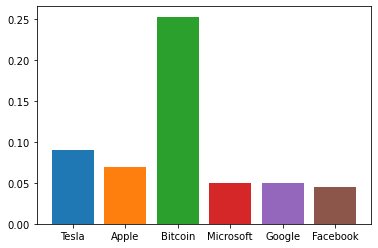

In [25]:
plt.bar('Tesla', df_tesla.avg_ratio[1])
plt.bar('Apple', df_apple.avg_ratio[1])
plt.bar('Bitcoin', df_bitcoin.avg_ratio[1])
plt.bar('Microsoft', df_microsoft.avg_ratio[1])
plt.bar('Google', df_google.avg_ratio[1])
plt.bar('Facebook', df_facebook.avg_ratio[1])
plt.show()

In [26]:
# pio.renderers.default = 'iframe_connected'

In [27]:

fig = go.Figure(data=[go.Candlestick(x=df_tesla.index,
                open=df_tesla.open,
                high=df_tesla.high,
                low=df_tesla.low,
                close=df_tesla.close)])

#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [28]:
#pf.plot_candlestick(df_tesla)